I think I learned more varieties of filters than those in https://www.biorxiv.org/content/10.1101/677237v3.full.pdf

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20200218 as param_iterator_obj,
    keygen
)

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+yuanyuan_8k_a_3day+maskcnn_polished_with_rcnn_k_bl+20200218_layer3',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all(cls_set):
    save_dir = global_vars['save_dir']
    count = 0
    
    for idx, param in enumerate(param_iterator_obj().generate()):
        
        if param['rcnn_bl_cls'] not in cls_set:
            # ignore cls=1,2 models.
            continue
            
        if param['kernel_size_l23'] not in {3,5}:
            # too big.
            continue
    
    
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        result = load_training_results(key, return_model=False, return_checkpoint=True)
        cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
        assert cc_raw.shape == (79,)
        # load loss curve to make sure we are good in approximation.
        corr_test = ((cc_raw/cc_max_all_neurons)**2).mean()
        # only keep 0.6+ models
        if corr_test < 0.62:
            continue
        
        count += 1
        
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        # show some results.
        verbose = count % 5 == 0
        
        if verbose:
            print(count, key, corr_test)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


15 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lmse/m_se0 0.6523471258179373
lateral
[0.2392097  0.46151167 0.61769745 0.74361897 0.84038093 0.92386815
 0.95698429 0.98361211 1.        ]


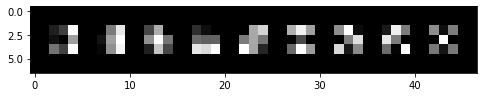

ff
[0.39796285 0.60145397 0.72387348 0.83361952 0.89956353 0.95589275
 0.97480156 0.9901872  1.        ]


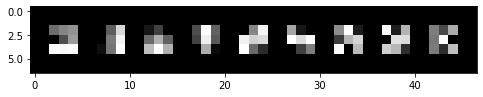

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lmse/m_se0 0.6736460960042622
lateral
[0.34235849 0.54086945 0.68305703 0.81138023 0.87309434 0.93239088
 0.95840411 0.98062543 1.        ]


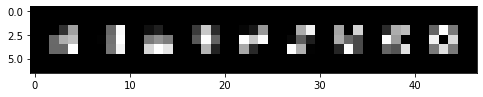

ff
[0.41290241 0.63053051 0.75868014 0.84463727 0.89581328 0.94291562
 0.96545125 0.98306534 1.        ]


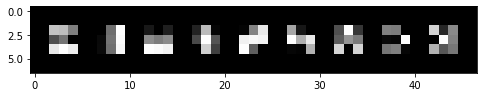

35 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lmse/m_se0 0.656547297432324
lateral
[0.24742418 0.41289721 0.57063585 0.66573711 0.73647917 0.80201625
 0.8303177  0.85319203 0.87015131 0.88538325 0.89748089 0.90781287
 0.91727148 0.9257104  0.93384316 0.94182579 0.94946204 0.95673647
 0.9637136  0.97051854]


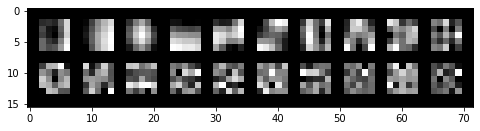

ff
[0.30507585 0.48028886 0.58479768 0.68115581 0.73841543 0.79495578
 0.82696358 0.85068123 0.86929555 0.88482693 0.89894214 0.90972919
 0.91958151 0.92837973 0.93699482 0.94494193 0.95222011 0.95921387
 0.96583519 0.97212274]


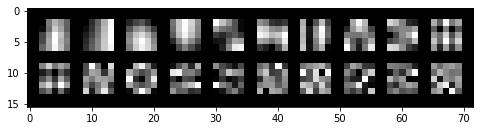

45 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lpoisson/m_se0 0.6375949584810023
lateral
[0.36423752 0.58099024 0.69835816 0.80039297 0.87426438 0.9381745
 0.96148227 0.98182918 1.        ]


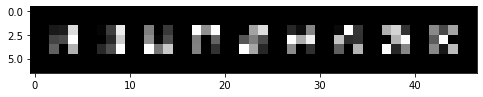

ff
[0.43805066 0.63173721 0.76683329 0.85134691 0.90427533 0.94406204
 0.9656157  0.98382893 1.        ]


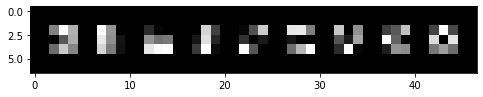

50 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lpoisson/m_se0 0.6431931766189245
lateral
[0.21679439 0.4305599  0.54723106 0.63886093 0.71881436 0.77307658
 0.80363    0.83361997 0.85906879 0.88179915 0.90084949 0.91581517
 0.92770033 0.93858715 0.94823893 0.95571283 0.96267379 0.96888427
 0.97474764 0.97965281]


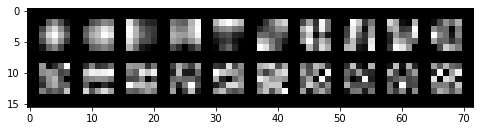

ff
[0.29626347 0.46598343 0.59112369 0.6841546  0.74967312 0.79776925
 0.83070465 0.85801488 0.88130091 0.89901134 0.91277657 0.92476359
 0.93535447 0.94478861 0.95356469 0.96011026 0.9660535  0.97185371
 0.97734378 0.98237684]


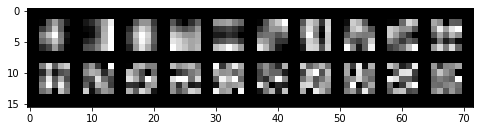

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lpoisson/m_se0 0.657516432041401
lateral
[0.33449284 0.50290484 0.63310198 0.72841337 0.78751409 0.83867724
 0.85931522 0.87728417 0.89287594 0.90600749 0.91732473 0.92635078
 0.93421774 0.94153526 0.94800284 0.95411713 0.96016602 0.96605341
 0.97160066 0.97694617]


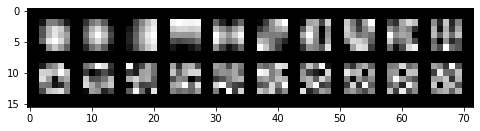

ff
[0.34302958 0.49827984 0.6231722  0.71437964 0.77620334 0.82846431
 0.85236236 0.8723947  0.89224024 0.90460895 0.91572962 0.92536786
 0.93397202 0.94144995 0.94875708 0.9552807  0.96169965 0.96764323
 0.97305909 0.97806033]


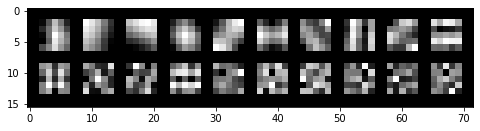

80 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lmse/m_se0 0.6362165034269824
lateral
[0.20300202 0.36196317 0.50069301 0.60604001 0.68806308 0.74894801
 0.79569274 0.83217288 0.85980825 0.88338283 0.90552628 0.92236265
 0.93733144 0.94722728 0.95605428 0.96266618 0.96862671 0.97383715
 0.97856378 0.98287657]


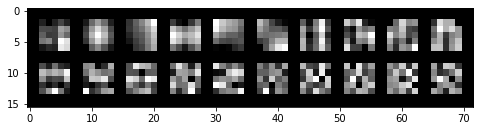

ff
[0.39800316 0.52860455 0.63813399 0.71388443 0.76297356 0.80839487
 0.84310079 0.87331641 0.89702686 0.91459394 0.92686445 0.93748909
 0.9475564  0.95693811 0.96580586 0.97148011 0.97663342 0.98118401
 0.98498623 0.98839517]


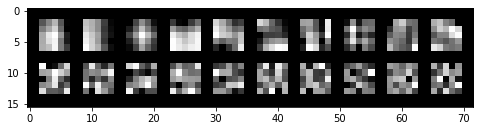

95 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lmse/m_se0 0.6446807568746027
lateral
[0.25125191 0.41794246 0.55677815 0.66121242 0.73677207 0.80514063
 0.83892529 0.86676223 0.89273648 0.91267377 0.9273044  0.93920357
 0.94890594 0.95690483 0.9624558  0.96741978 0.97207284 0.97635156
 0.98029732 0.9840305 ]


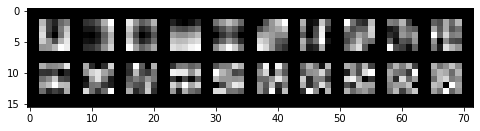

ff
[0.31015388 0.48841069 0.61380716 0.71644143 0.77225029 0.82446203
 0.85654424 0.88123055 0.90278108 0.91967098 0.9312787  0.94044746
 0.94938019 0.95742051 0.96365066 0.96883792 0.97352616 0.97790024
 0.98158759 0.98506164]


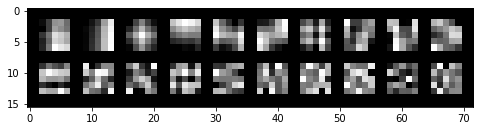

100 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch8/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lpoisson/m_se0 0.6243678454825125
lateral
[0.26278647 0.43688689 0.5950979  0.71262023 0.81997046 0.89029484
 0.94084937 0.98110553 1.        ]


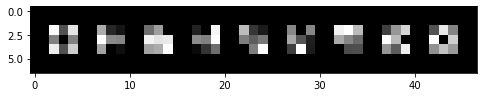

ff
[0.50952543 0.64908587 0.77836473 0.86880716 0.91454081 0.95551394
 0.97891564 0.99162542 1.        ]


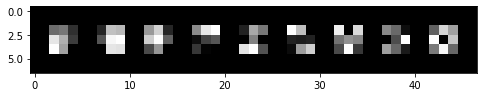

115 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lpoisson/m_se0 0.6504379749329968
lateral
[0.18623453 0.36636135 0.48432305 0.58406927 0.65114341 0.71545541
 0.76061003 0.80007162 0.83617595 0.86674736 0.88981262 0.91062501
 0.92807547 0.94162318 0.95225512 0.95915391 0.96550562 0.97155207
 0.97715097 0.98176935]


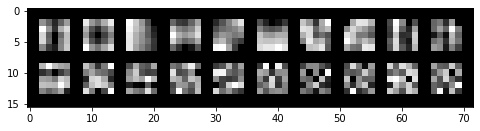

ff
[0.39917575 0.52639881 0.63766763 0.71597687 0.7687778  0.80697797
 0.83741888 0.86383598 0.88909476 0.90900381 0.92471352 0.93870259
 0.94971833 0.95984813 0.96775777 0.97352718 0.97810242 0.9824253
 0.98625198 0.98962028]


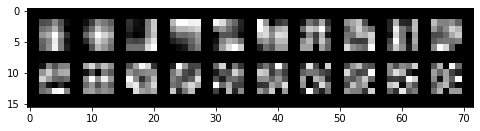

130 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lpoisson/m_se0 0.6719229257718388
lateral
[0.38275972 0.56243246 0.70281597 0.81515552 0.88086539 0.94080868
 0.96487965 0.98451975 1.        ]


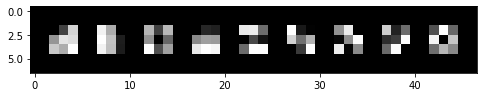

ff
[0.44778177 0.62739962 0.75260224 0.86388407 0.91260996 0.95659723
 0.97469756 0.98959794 1.        ]


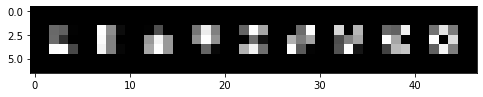

135 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch8/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lmse/m_se1 0.626168381432336
lateral
[0.27446474 0.46243846 0.61942627 0.7380211  0.82981335 0.89705997
 0.94902401 0.97708655 1.        ]


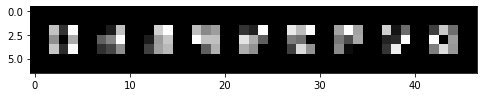

ff
[0.37936617 0.60622478 0.7255899  0.8103501  0.89139294 0.94526915
 0.97739227 0.9929675  1.        ]


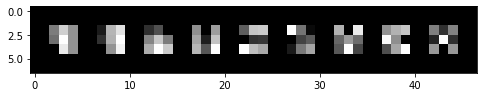

140 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch8/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lmse/m_se1 0.6245927788132128
lateral
[0.25050116 0.3543133  0.44983615 0.52946889 0.59953213 0.65637051
 0.71055259 0.76080564 0.80520457 0.84416675 0.87678035 0.90723838
 0.93373327 0.94761197 0.95995323 0.96840619 0.97412476 0.97911085
 0.98357593 0.98782972]


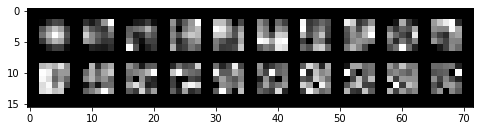

ff
[0.36782257 0.51617784 0.6560485  0.72642418 0.78071167 0.82466548
 0.85614075 0.88306984 0.90757921 0.92926234 0.94445722 0.95490539
 0.96314704 0.96945778 0.97459674 0.97962448 0.98408106 0.98771023
 0.99051724 0.9930402 ]


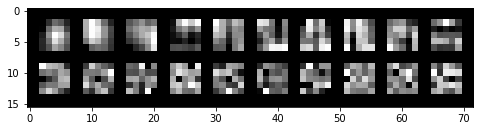

150 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lmse/m_se1 0.6538229217544085
lateral
[0.28482461 0.47205993 0.63927799 0.75714463 0.85326997 0.926929
 0.96013061 0.98473292 1.        ]


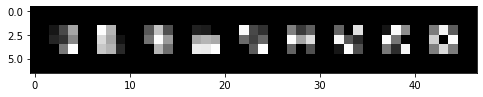

ff
[0.36810046 0.58772172 0.70976644 0.81567217 0.88444074 0.94538164
 0.96687592 0.98571037 1.        ]


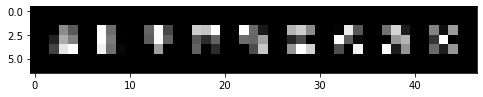

155 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lmse/m_se1 0.6418177038379836
lateral
[0.20963178 0.40606448 0.53610209 0.63520882 0.71014247 0.78313652
 0.81493204 0.84415456 0.86370667 0.88320767 0.89791589 0.91076762
 0.92220712 0.93191147 0.94077466 0.94869482 0.95635353 0.963407
 0.97010287 0.97668196]


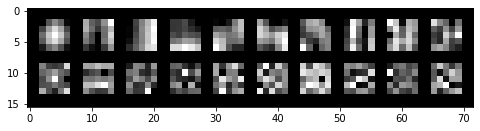

ff
[0.29642626 0.46186204 0.60787178 0.69589139 0.75526418 0.80352824
 0.83675737 0.86244911 0.8820896  0.89781804 0.91089368 0.92201349
 0.93187714 0.94101108 0.94935064 0.95643658 0.96283632 0.96898495
 0.97478885 0.97978199]


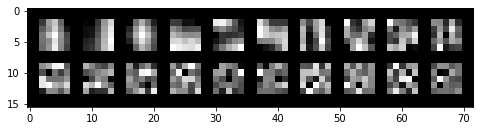

165 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lmse/m_se1 0.6753551093393897
lateral
[0.34910439 0.53678877 0.67206125 0.79933362 0.86775791 0.9311531
 0.95908558 0.98093576 1.        ]


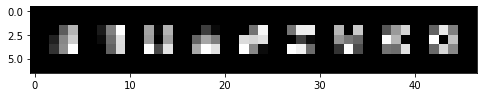

ff
[0.3788495  0.59351069 0.73339251 0.83266499 0.89339139 0.94276925
 0.96737686 0.98526157 1.        ]


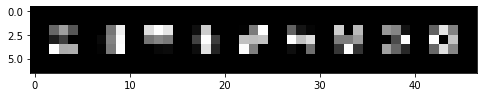

170 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lmse/m_se1 0.6684467834430816
lateral
[0.26023052 0.41661872 0.56750206 0.6649947  0.73508849 0.79732618
 0.82750321 0.85121915 0.87183335 0.88993401 0.90159644 0.91264379
 0.92249292 0.9317348  0.93931682 0.9467468  0.95354223 0.96024349
 0.96658478 0.97272224]


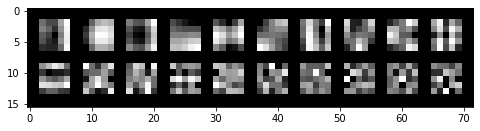

ff
[0.29130787 0.45112664 0.56182188 0.66821594 0.73420519 0.7890651
 0.81761427 0.84451472 0.86402167 0.88072619 0.89440663 0.90635134
 0.91716634 0.92684691 0.93516683 0.94318555 0.95080142 0.95802
 0.96481828 0.97131769]


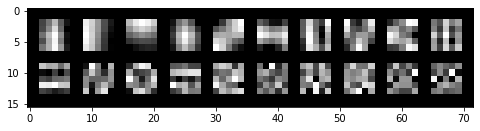

185 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l235/sc0.01/sm0.000005/lpoisson/m_se1 0.6305333990408021
lateral
[0.26325185 0.50518205 0.62341587 0.69489231 0.75333405 0.80676537
 0.8366534  0.86118054 0.88252813 0.89944074 0.91386256 0.92441527
 0.93398264 0.94201565 0.94949672 0.95612169 0.96244125 0.96835592
 0.97384438 0.97886191]


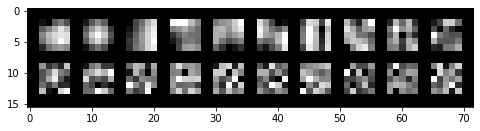

ff
[0.35605518 0.49995243 0.62556023 0.72667336 0.78644188 0.83901792
 0.86405475 0.88657819 0.90169102 0.91411116 0.92525356 0.93461935
 0.94300007 0.95068642 0.95735759 0.96350453 0.96945287 0.97468124
 0.97930571 0.98357731]


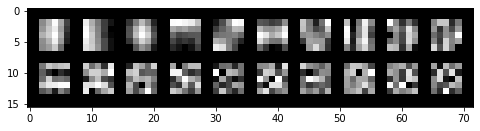

200 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lpoisson/m_se1 0.6677939357363986
lateral
[0.41156133 0.58769093 0.71536774 0.82198401 0.88073795 0.93319129
 0.95678179 0.97902204 1.        ]


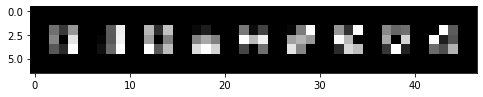

ff
[0.43650065 0.64268943 0.76370812 0.83902858 0.89081563 0.93624588
 0.96002753 0.98010565 1.        ]


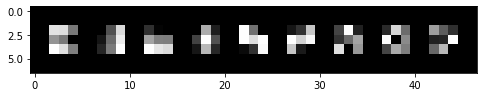

210 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lmse/m_se1 0.6466639993324228
lateral
[0.2905034  0.47022887 0.6407037  0.75709986 0.8663845  0.9394348
 0.96365528 0.98374524 1.        ]


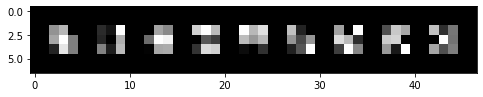

ff
[0.46962363 0.65451443 0.77271601 0.86656441 0.91827191 0.9605615
 0.97989942 0.99100364 1.        ]


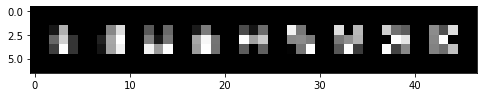

225 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lmse/m_se1 0.6624371123885079
lateral
[0.3875108  0.57035257 0.70123958 0.82316454 0.89511822 0.95488343
 0.97187529 0.98700284 1.        ]


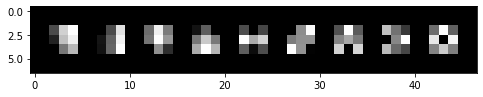

ff
[0.43052704 0.63559568 0.76424274 0.85739248 0.91311597 0.95554208
 0.97241006 0.98795355 1.        ]


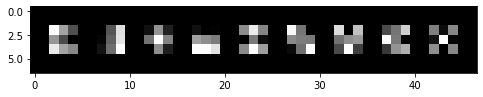

230 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lmse/m_se1 0.652350526825657
lateral
[0.33690159 0.48085264 0.60191381 0.69866467 0.77402648 0.83121791
 0.8542767  0.8758771  0.89529307 0.91305547 0.92380786 0.93334299
 0.94151438 0.94904256 0.95482863 0.96026956 0.96556143 0.97035355
 0.97508176 0.97953317]


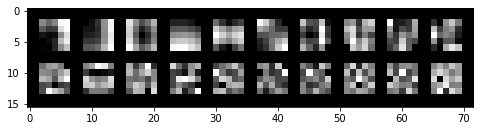

ff
[0.38581225 0.56028447 0.6689622  0.74913654 0.80156898 0.84210046
 0.86702921 0.88620598 0.90444908 0.91865705 0.929172   0.93766473
 0.94543507 0.9524402  0.95852424 0.96392068 0.96874874 0.97341307
 0.97773477 0.98198957]


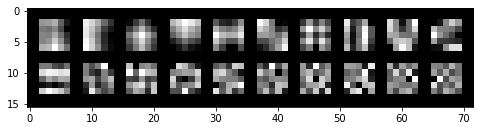

245 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/sc0.01/sm0.000005/lpoisson/m_se1 0.6473001994061082
lateral
[0.34249359 0.51356436 0.65803928 0.75652165 0.84723518 0.92700517
 0.9560018  0.98036097 1.        ]


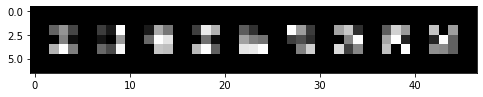

ff
[0.51370294 0.67001026 0.7802284  0.8639875  0.91872187 0.9604937
 0.97667247 0.99053642 1.        ]


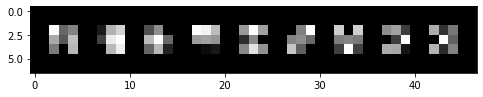

260 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/sc0.01/sm0.000005/lpoisson/m_se1 0.6769850353199182
lateral
[0.33748459 0.51227298 0.6536486  0.78948713 0.86815814 0.94160595
 0.96389282 0.98416193 1.        ]


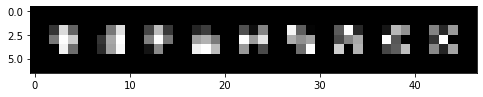

ff
[0.43502338 0.61541227 0.75006379 0.85245002 0.91021172 0.95361192
 0.97208512 0.98929042 1.        ]


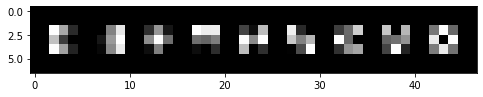

265 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l235/sc0.01/sm0.000005/lpoisson/m_se1 0.6744396747745691
lateral
[0.29271759 0.44017613 0.56479036 0.65452411 0.73654628 0.79556067
 0.82619086 0.85160931 0.87516778 0.89749439 0.91262182 0.92490878
 0.93463661 0.94316407 0.9504515  0.95666966 0.96245201 0.96791074
 0.97312891 0.97807219]


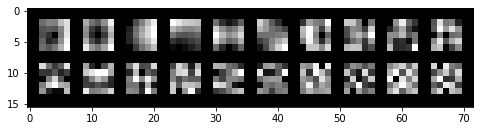

ff
[0.37370153 0.53203878 0.63723088 0.72461507 0.77989127 0.82134934
 0.84940029 0.87248913 0.89167834 0.90871757 0.92284745 0.93285251
 0.94144576 0.94992054 0.95667738 0.96243669 0.96754438 0.97248715
 0.97711243 0.98154356]


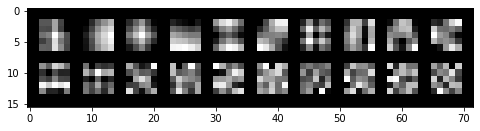

265


In [13]:
collect_all({3,4})